In [1]:
%load_ext autoreload
%autoreload 2
import warnings
import numpy as np
import time
import os
from dotenv import load_dotenv
os.environ["USE_PYGEOS"] = "0"
import napari_sparrow as nas
from spatialdata import read_zarr
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
%run own_and_modified_functions.ipynb
warnings.simplefilter(action='ignore')

the value of the environment variable BASIC_DCT_BACKEND is not in ["JAX","SCIPY"]


In [2]:
OUTPUT_DIR = '/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data'
sdata = read_zarr( os.path.join(  OUTPUT_DIR, 'sdata.zarr'  ) )
anndata = sc.read('/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/anndataNucA11') # reset original anndata
# delete anndata
del sdata.table
# create anndata
sdata.table = anndata
sdata

SpatialData object with:
├── Images
│     ├── 'clahe': SpatialImage[cyx] (1, 12864, 10720)
│     ├── 'raw_image': SpatialImage[cyx] (1, 12864, 10720)
│     ├── 'tiling_correction': SpatialImage[cyx] (1, 12864, 10720)
│     ├── 'tophat_filtered': SpatialImage[cyx] (1, 12864, 10720)
│     └── 'transcript_density': SpatialImage[cyx] (1, 12864, 10720)
├── Labels
│     └── 'segmentation_mask': SpatialImage[yx] (12864, 10720)
├── Points
│     └── 'transcripts': DataFrame with shape: (4754932, 3) (2D points)
├── Shapes
│     ├── 'expanded_cells20': GeoDataFrame shape: (11228, 1) (2D shapes)
│     ├── 'filtered_expanded_cells20_low_counts': GeoDataFrame shape: (367, 1) (2D shapes)
│     ├── 'filtered_expanded_cells20_segmentation': GeoDataFrame shape: (50, 1) (2D shapes)
│     ├── 'filtered_expanded_cells20_size': GeoDataFrame shape: (280, 1) (2D shapes)
│     ├── 'filtered_segmentation_mask_boundaries_low_counts': GeoDataFrame shape: (367, 1) (2D shapes)
│     ├── 'filtered_segmentation_mask_

              mean  variance       std
gene                                  
Acta2    -0.013174  0.711543  0.843530
Adamtsl2 -0.008687  0.807990  0.898882
Adgre1   -0.003641  0.887707  0.942182
Adgrg6   -0.010040  0.724247  0.851027
Atp6v0d2 -0.004666  0.737323  0.858675
...            ...       ...       ...
Vwf      -0.004971  0.926039  0.962309
Wnt2     -0.004918  0.814758  0.902640
Wnt9b    -0.020738  0.385461  0.620855
Wt1      -0.019533  0.266815  0.516541
Xcr1     -0.018143  0.333090  0.577140

[99 rows x 3 columns]


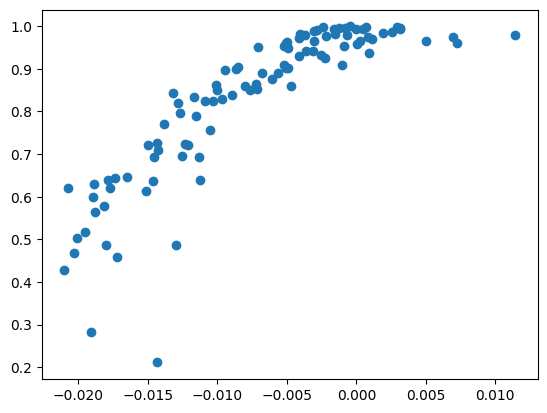

In [3]:
sdata.table.to_df()
# calculate average per column
avg = sdata.table.to_df().mean(axis=0)
# calculate variance per column
var = sdata.table.to_df().var(axis=0)
# calculate std per column
std = sdata.table.to_df().std(axis=0)
# make dataframe with columns avg and var
pd_stats = pd.DataFrame({'mean': avg, 'variance': var, 'std': std})
print(pd_stats)
# plot mean vs variance
plt.scatter(pd_stats['mean'], pd_stats['std'])

In [4]:
path_mg = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv"
path_marker_genes = path_mg,
marker_genes = pd.read_csv(path_marker_genes[0], sep=',',index_col=0)
scores_cell_celltype = pd.DataFrame()
cell_types = marker_genes.columns.tolist()
matrix = sdata.table.to_df()
# Divide the expression of each gene by its std
# divide each column of matrix by std of that column
matrix = matrix.div(matrix.std(axis=0))
all_mean_expression = sdata.table.to_df().mean(axis=0)


In [5]:
Nmarkers = marker_genes.sum(axis=0).to_list()
print(marker_genes.columns.tolist())
Nmarkers

['Hepa', 'LSEC', 'Endo vein', 'Chol', 'Kupf', 'Stel', 'Fibr', 'B cell', 'Meso']


[10, 11, 9, 7, 16, 16, 21, 4, 5]

In [6]:

for cell_type in cell_types:
    scores_cells = []
    for i in range(matrix.shape[0]):
        score = 0 
        for gene in marker_genes[marker_genes[cell_type] == 1].index.tolist():
            score = score + (matrix[gene][i] - all_mean_expression[gene])
        scores_cells.append(score)
    scores_cell_celltype[cell_type] = scores_cells
scores_cell_celltype 


,Hepa,LSEC,Endo vein,Chol,Kupf,Stel,Fibr,B cell,Meso
0,5.861580,-3.153429,-0.535184,0.382180,-2.133089,-4.245910,-3.314634,-0.504064,-0.483616
1,-4.979719,-0.596915,-1.827885,-3.414234,30.353657,-5.605609,25.855924,-0.504064,23.139886
2,-5.072871,-3.153429,-1.827885,-2.729599,-2.132549,-4.704757,40.810118,-0.504064,40.807220
3,-3.231192,-3.153429,-1.827885,-1.851334,-4.061868,-4.645351,17.699311,-0.504064,13.802720
4,-2.301914,-3.153429,-1.827885,-0.436926,-4.061868,-2.847748,-3.132565,-0.504064,-0.483616
...,...,...,...,...,...,...,...,...,...
11223,-0.235959,-3.153429,-1.827885,-0.865403,-4.061868,-2.559206,-3.329815,-0.504064,-0.483616
11224,5.060093,-3.153429,-1.827885,0.069933,0.580741,-1.913876,-2.498120,-0.504064,-0.483616
11225,0.858042,-3.153429,-1.827885,-0.896138,0.618578,-5.159681,-4.228405,-0.504064,-0.483616
11226,-7.600524,-3.153429,-1.827885,-2.956632,1.597105,29.493776,18.377426,-0.504064,-0.483616


-8.520634572341509
-3.9584371737242656
3.6307834014027747
7.58922057512704
0.75


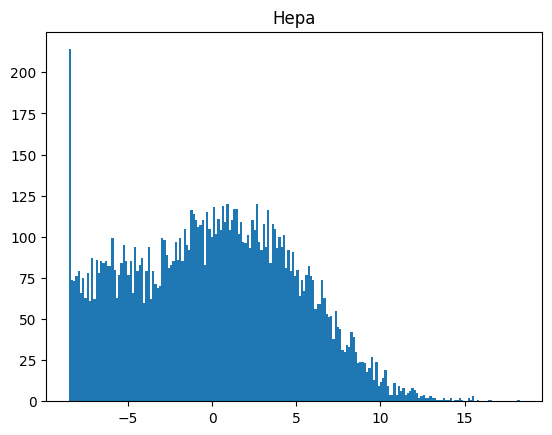

-3.15342934646851
-3.15342934646851
-0.5824884014122753
2.5709409450562344
0.4946562166013538


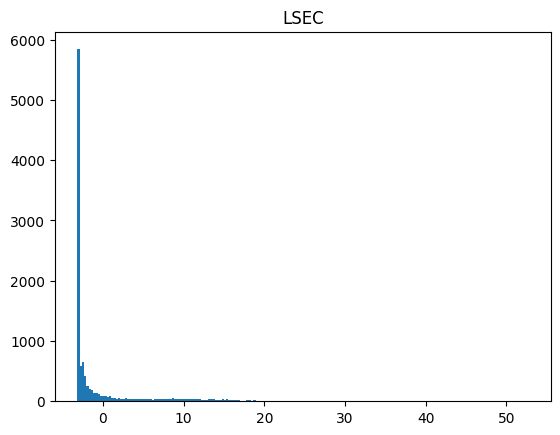

-1.8278850425694095
-1.8278850425694095
-0.3393932740721526
1.488491768497257
0.4153900961881012


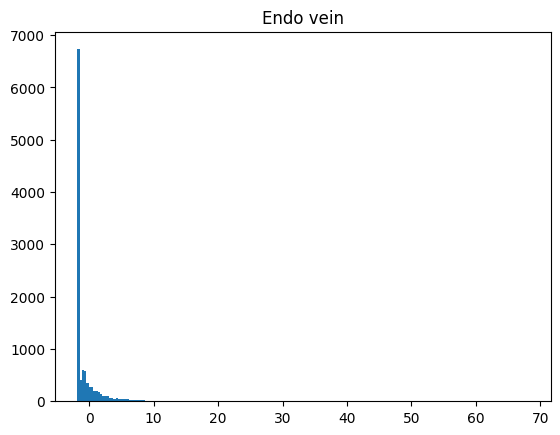

-3.414233705439205
-2.153853443356971
1.0681182625568624
3.221971705913833
0.75


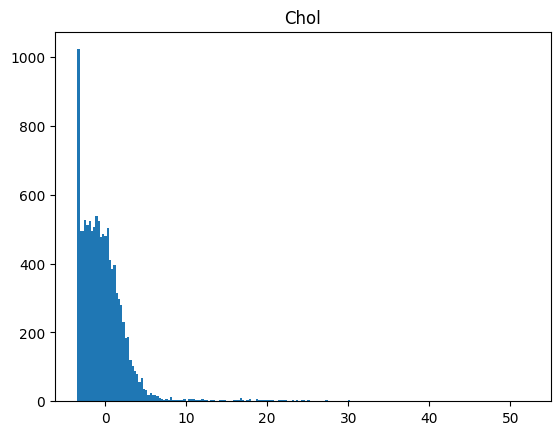

-4.061868276114145
-4.061868276114145
-1.1865808149471564
2.875287461166989
0.733701460634129


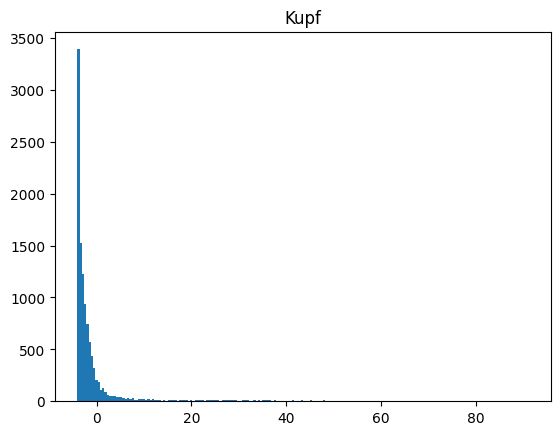

-6.208251226806471
-3.622703910997395
0.12777915197209583
3.7504830629694905
0.75


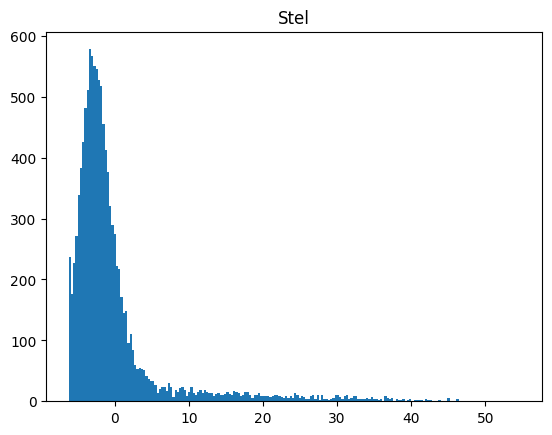

-5.276974525124843
-3.80027105193236
-0.8944663140935112
2.905804737838849
0.75


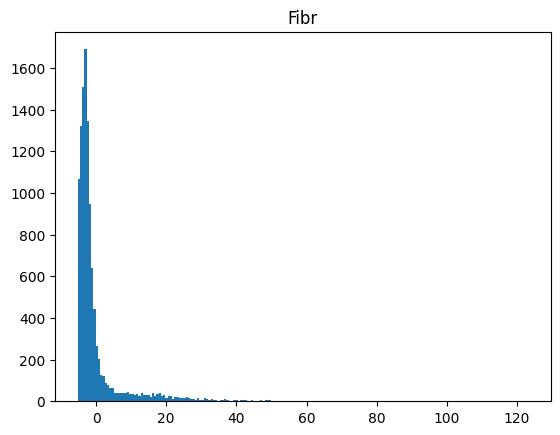

-0.5040637071216946
-0.5040637071216946
-0.5040637071216946
0.0
0.0553081581759886


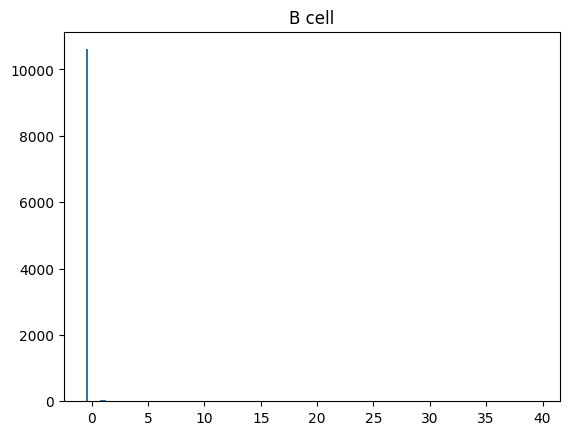

-0.4836163218615129
-0.4836163218615129
-0.4836163218615129
0.0
0.04845030281439259


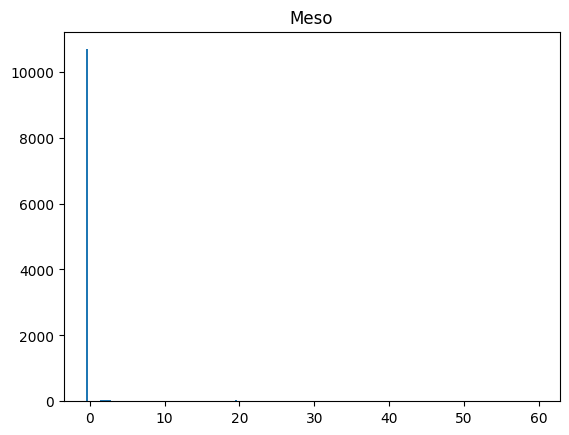

In [7]:
# plot histogram of each column of scores_cell_celltype
for cell_type in cell_types:
    plt.hist(scores_cell_celltype[cell_type], bins=200)
    plt.title(cell_type)
    print(np.min(scores_cell_celltype[cell_type]))
    print(np.percentile(scores_cell_celltype[cell_type],25))
    print(np.percentile(scores_cell_celltype[cell_type],75))
    print(np.percentile(scores_cell_celltype[cell_type],75) - np.percentile(scores_cell_celltype[cell_type],25))
    # percentage above first quartile
    print(np.sum(scores_cell_celltype[cell_type] > np.percentile(scores_cell_celltype[cell_type],25))/len(scores_cell_celltype[cell_type]))
    plt.show()

In [8]:
# replace each value scores_cell_celltype by its percentile
for cell_type in cell_types:
    scores_cell_celltype[cell_type] = scores_cell_celltype[cell_type].rank(pct=True)
scores_cell_celltype

,Hepa,LSEC,Endo vein,Chol,Kupf,Stel,Fibr,B cell,Meso
0,0.876202,0.252716,0.728937,0.658799,0.635198,0.160135,0.355629,0.47239,0.475819
1,0.196918,0.749510,0.292349,0.026274,0.969808,0.036605,0.974172,0.47239,0.997684
2,0.191218,0.252716,0.292349,0.154524,0.635376,0.109726,0.991183,0.47239,0.999198
3,0.286961,0.252716,0.292349,0.298094,0.133194,0.116316,0.949056,0.47239,0.992162
4,0.339508,0.252716,0.292349,0.531261,0.133194,0.376113,0.399092,0.47239,0.475819
...,...,...,...,...,...,...,...,...,...
11223,0.478180,0.252716,0.292349,0.462237,0.133194,0.422782,0.351621,0.47239,0.475819
11224,0.837104,0.252716,0.292349,0.610082,0.847079,0.523780,0.538030,0.47239,0.475819
11225,0.557268,0.252716,0.292349,0.457161,0.848058,0.068222,0.168864,0.47239,0.475819
11226,0.057357,0.252716,0.292349,0.119255,0.869701,0.981653,0.953064,0.47239,0.475819


0.008193801211257571
0.25006679729248305
0.7500222657641611
0.49995546847167804
0.75


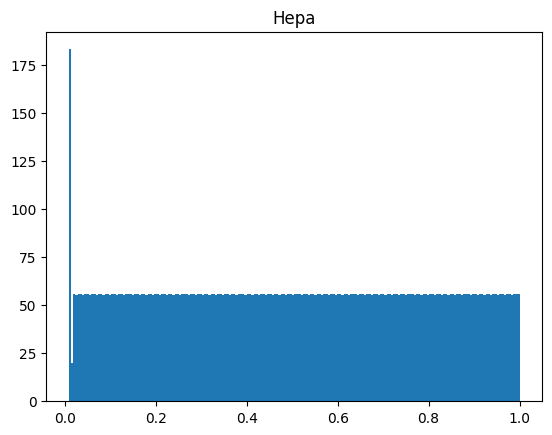

0.25271642322764515
0.25271642322764515
0.7500222657641611
0.49730584253651594
0.4946562166013538


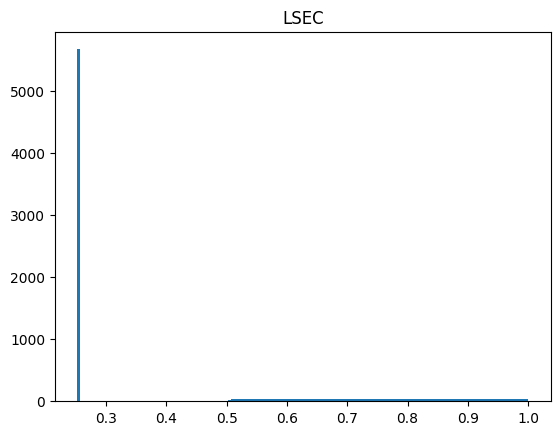

0.2923494834342715
0.2923494834342715
0.7500222657641611
0.4576727823298896
0.4153900961881012


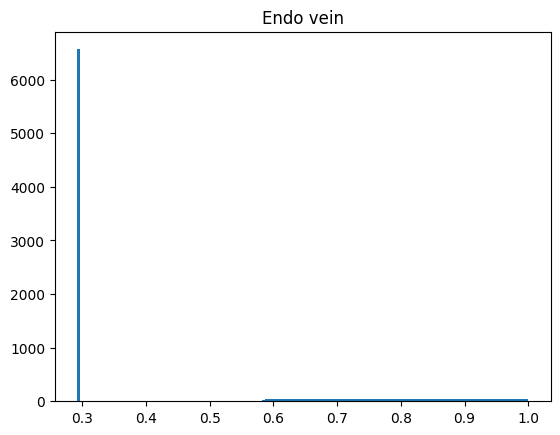

0.026273601710010686
0.25006679729248305
0.7500222657641611
0.49995546847167804
0.75


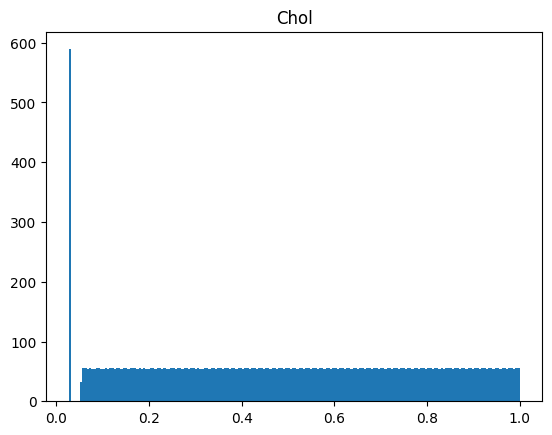

0.13319380121125757
0.13319380121125757
0.7500222657641611
0.6168284645529035
0.733701460634129


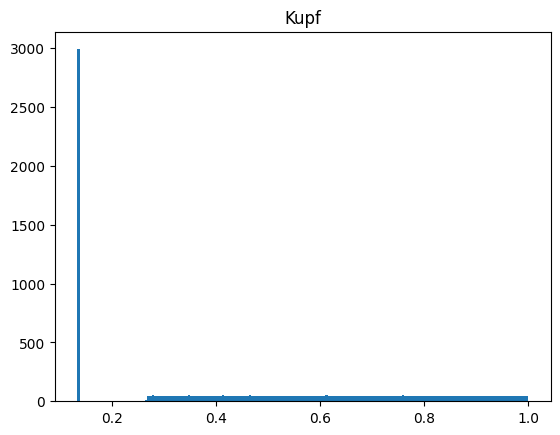

0.007481296758104738
0.25006679729248305
0.7500222657641611
0.49995546847167804
0.75


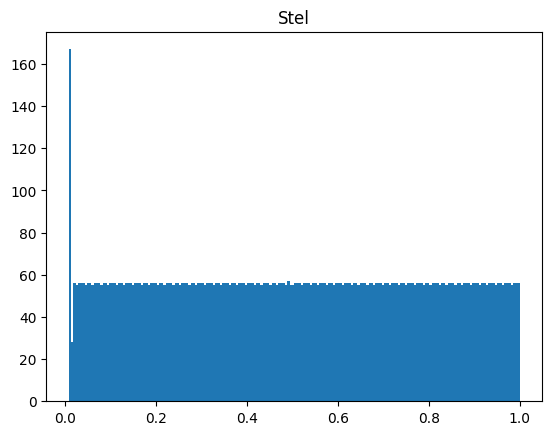

0.01371571072319202
0.25006679729248305
0.7500222657641611
0.49995546847167804
0.75


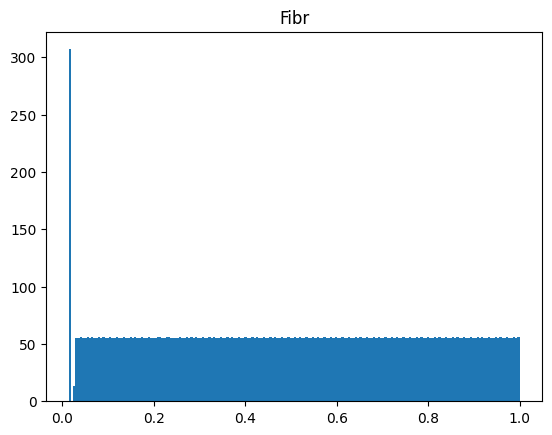

0.47239045244032773
0.47239045244032773
0.47239045244032773
0.0
0.0553081581759886


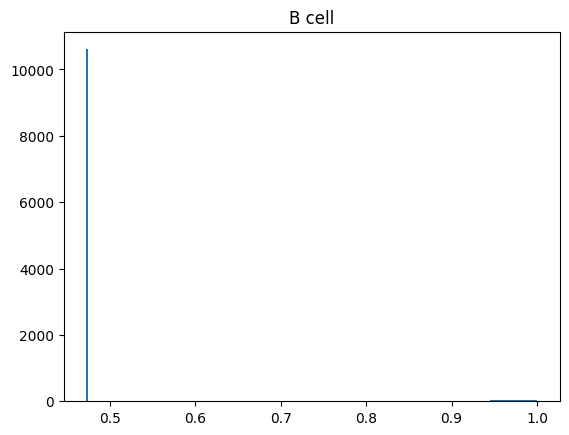

0.47581938012112573
0.47581938012112573
0.47581938012112573
0.0
0.04845030281439259


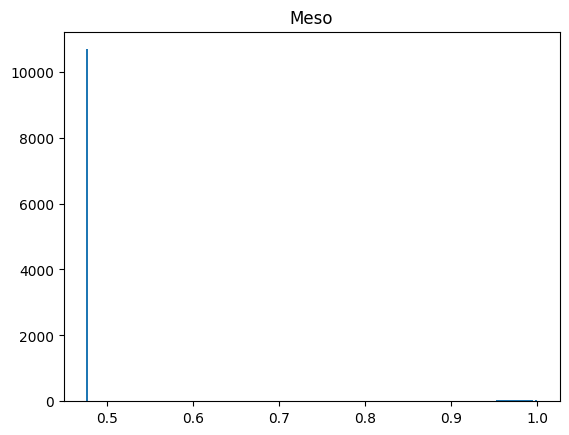

In [15]:
for cell_type in cell_types:
    plt.hist(scores_cell_celltype[cell_type], bins=200)
    plt.title(cell_type)
    print(np.min(scores_cell_celltype[cell_type]))
    print(np.percentile(scores_cell_celltype[cell_type],25))
    print(np.percentile(scores_cell_celltype[cell_type],75))
    print(np.percentile(scores_cell_celltype[cell_type],75) - np.percentile(scores_cell_celltype[cell_type],25))
    # percentage above first quartile
    print(np.sum(scores_cell_celltype[cell_type] > np.percentile(scores_cell_celltype[cell_type],25))/len(scores_cell_celltype[cell_type]))
    plt.show()

In [9]:
scores_cell_celltype2 = scores_cell_celltype.copy(deep=True)
scores_cell_celltype2[scores_cell_celltype2 > scores_cell_celltype2.quantile(.25)] = True
scores_cell_celltype2

,Hepa,LSEC,Endo vein,Chol,Kupf,Stel,Fibr,B cell,Meso
0,True,0.252716,True,True,True,0.160135,True,0.47239,0.475819
1,0.196918,True,0.292349,0.026274,True,0.036605,True,0.47239,True
2,0.191218,0.252716,0.292349,0.154524,True,0.109726,True,0.47239,True
3,True,0.252716,0.292349,True,0.133194,0.116316,True,0.47239,True
4,True,0.252716,0.292349,True,0.133194,True,True,0.47239,0.475819
...,...,...,...,...,...,...,...,...,...
11223,True,0.252716,0.292349,True,0.133194,True,True,0.47239,0.475819
11224,True,0.252716,0.292349,True,True,True,True,0.47239,0.475819
11225,True,0.252716,0.292349,True,True,0.068222,0.168864,0.47239,0.475819
11226,0.057357,0.252716,0.292349,0.119255,True,True,True,0.47239,0.475819


In [10]:
scores_cell_celltype

,Hepa,LSEC,Endo vein,Chol,Kupf,Stel,Fibr,B cell,Meso
0,0.876202,0.252716,0.728937,0.658799,0.635198,0.160135,0.355629,0.47239,0.475819
1,0.196918,0.749510,0.292349,0.026274,0.969808,0.036605,0.974172,0.47239,0.997684
2,0.191218,0.252716,0.292349,0.154524,0.635376,0.109726,0.991183,0.47239,0.999198
3,0.286961,0.252716,0.292349,0.298094,0.133194,0.116316,0.949056,0.47239,0.992162
4,0.339508,0.252716,0.292349,0.531261,0.133194,0.376113,0.399092,0.47239,0.475819
...,...,...,...,...,...,...,...,...,...
11223,0.478180,0.252716,0.292349,0.462237,0.133194,0.422782,0.351621,0.47239,0.475819
11224,0.837104,0.252716,0.292349,0.610082,0.847079,0.523780,0.538030,0.47239,0.475819
11225,0.557268,0.252716,0.292349,0.457161,0.848058,0.068222,0.168864,0.47239,0.475819
11226,0.057357,0.252716,0.292349,0.119255,0.869701,0.981653,0.953064,0.47239,0.475819


In [11]:
# set each value in scores_cell_celltype to NaN that is False in scores_cell_celltype2 
scores_cell_celltype[scores_cell_celltype2 == False] = np.nan
# select column of max value in each row
a = scores_cell_celltype.idxmax(axis=1).to_dict()
# get keys of dict a with value = np.NaN
keys = [k for k, v in a.items() if pd.isnull(v)]
keys



[]

In [12]:
# min max scale scores per cell type to make them more comparable between cell types 
scores_cell_celltype_norm = scores_cell_celltype.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
scores_cell_celltype_norm

,Hepa,LSEC,Endo vein,Chol,Kupf,Stel,Fibr,B cell,Meso
0,0.875180,0.000000,0.616953,0.649593,0.579142,0.153805,0.346668,0.0,0.000000
1,0.190284,0.664799,0.000000,0.000000,0.965168,0.029343,0.973813,0.0,0.995582
2,0.184537,0.000000,0.000000,0.131711,0.579348,0.103015,0.991060,0.0,0.998471
3,0.281070,0.000000,0.000000,0.279155,0.000000,0.109655,0.948347,0.0,0.985048
4,0.334052,0.000000,0.000000,0.518613,0.000000,0.371411,0.390735,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
11223,0.473869,0.000000,0.000000,0.447727,0.000000,0.418431,0.342604,0.0,0.000000
11224,0.835758,0.000000,0.000000,0.599561,0.823581,0.520190,0.531606,0.0,0.000000
11225,0.553610,0.000000,0.000000,0.442513,0.824711,0.061199,0.157305,0.0,0.000000
11226,0.049569,0.000000,0.000000,0.095491,0.849679,0.981515,0.952411,0.0,0.000000


In [13]:
# cell is annotated with the cell type with the highest score
sc_cell_cellt = scores_cell_celltype_norm.idxmax(axis=1).to_dict()
# all indices of scores_cell_celltype with max value of row < 0
unknown_cells = scores_cell_celltype_norm[scores_cell_celltype_norm.max(axis=1) < 0].index.tolist()
print(len(unknown_cells))
# change the values of keys in list
for i in unknown_cells:
    sc_cell_cellt[i] = 'unknown'

0


In [14]:
sc_cell_cellt = {str(k): v for k, v in sc_cell_cellt.items()}
sdata.table.obs["annotation_own_score_genes"] = sc_cell_cellt.values()
# cleanliness of each annotation is calculated
max_scores = scores_cell_celltype_norm.max(axis=1)
second_scores = scores_cell_celltype_norm.apply(lambda x: x.nlargest(2).values[-1], axis=1)
cleanliness = (max_scores - second_scores) / ((max_scores + second_scores) / 2)
sc_cell_cleanl = cleanliness.to_dict()
for i in unknown_cells:
    sc_cell_cleanl[i] = 0
sc_cell_cleanl = {str(k): v for k, v in sc_cell_cleanl.items()}
sdata.table.obs["cleanliness_own_score_genes"] = sc_cell_cleanl.values()